<a href="https://colab.research.google.com/github/pawan-iit/Img-Classification-CNN/blob/main/M22AI596_Chart_Img_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Define the paths to your image and csv folders
train_val_dir = "/content/drive/MyDrive/ML_Assignment3/test"
test_dir = "/content/drive/MyDrive/ML_Assignment3/train_val"
train_path_labels = "/content/drive/MyDrive/ML_Assignment3/train_val_labels/train_path_labels.csv"
train_val_labels = pd.read_csv(train_path_labels)
#train_val_labels = pd.read_csv(train_path_labels)

# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
  if filename.endswith('.png'):
      # Load the images and resize them to (128, 128) with 3 color 
      img = cv2.imread(os.path.join(train_val_dir, filename))
      img = cv2.resize(img, (128, 128))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # img = Image.open(os.path.join(train_val_dir, filename))
      img_array = np.array(img)
    # Append the array to the list of images
      images.append(img_array)
      labels.append(filename)
    # Convert the string labels to numerical labels

le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_train.shape







(50, 128, 128, 3)

In [114]:

x_train[:5]
y_train[:5]

array([ 1, 12, 23,  0, 48])

In [115]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
    # Load the images and resize them to (128, 128) with 3 color channels
      img = cv2.imread(os.path.join(test_dir, filename))
      img = cv2.resize(img, (128, 128))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = Image.open(os.path.join(test_dir, filename))
      img_array = np.array(img)
    # Append the array to the list of images
      images.append(img_array)
      labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)


In [116]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)


x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [117]:
x_test.shape

(983, 128, 128, 3)

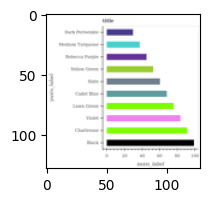

In [118]:

# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[28])
plt.imshow(x_train[48])

In [119]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])


In [120]:
y_train
y_train.shape
y_test.shape

(983,)

In [121]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

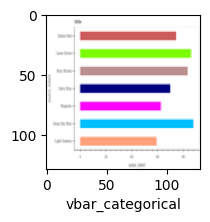

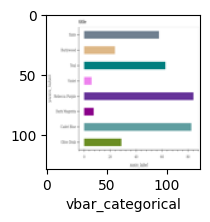

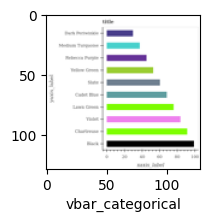

In [122]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,28)
image_sample(x_train,y_train,48)

In [108]:
# now we have mapped the corresponding labels to the image

# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

x_test.shape

(50, 128, 128, 3)

In [123]:

# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']


In [124]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [126]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

ValueError: ignored

In [127]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


ValueError: ignored

In [128]:
model.evaluate(x_test,y_test)


ValueError: ignored

In [129]:





y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

cnn_model.evaluate(x_test,y_test)

image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)


# Observation: we can see some wrong predictions
y_pred = cnn_model.predict(x_test)
y_pred[:5]

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


y_test[:5]


# here we see some values are not matching

# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

# some values are not matching
print("classification report: \n", classification_report(y_test,y_classes))

# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

ValueError: ignored

In [96]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
    layer.trainable = False

# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model architecture
pt_model.summary()

# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)


# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

ValueError: ignored